# Business Problem:-

# Given any products category,promotion,color and stars , we need to build a Machine Learning Model whether this product is going #to be a Top or Flop Product.In Other Words we can say this is a Binary Classification what we are trying to solve.

# Reading the data

In [34]:
import pandas as pd
data=pd.read_csv(r"C:\Users\91996\Desktop\ML\direction\Deliverable\historic.csv")

In [35]:
test_data=pd.read_csv(r"C:\Users\91996\Desktop\ML\direction\Deliverable\prediction_input.csv")

In [4]:
data

,item_no,category,main_promotion,color,stars,success_indicator
0,739157,Tunic,Catalog,Green,3.1,flop
1,591846,Hoodie,Category_Highlight,Red,1.5,flop
2,337574,Sweatshirt,Catalog,Red,4.4,top
3,401933,Polo-Shirt,Category_Highlight,Blue,3.1,flop
4,812151,Hoodie,Category_Highlight,Green,4.1,top
...,...,...,...,...,...,...
7995,280947,T-Shirt,Catalog,Blue,3.9,flop
7996,874952,Sweatshirt,Frontpage_Header,Green,3.5,top
7997,891640,T-Shirt,Category_Highlight,Yellow,4.0,flop
7998,786448,Blouse,Category_Highlight,Blue,2.6,flop


In [36]:
del data['item_no']
del test_data['item_no']    

# Data Preprocessing:-

# Checking for Missing Values:-

In [16]:
data.isna().sum()

category             0
main_promotion       0
color                0
stars                0
success_indicator    0
dtype: int64

# We donot have Nan values ,so no imputation technique is required.

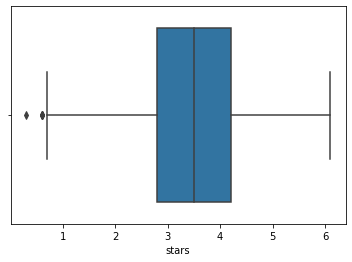

In [18]:
import seaborn as sns
sns.boxplot(data.stars)

# Removing outliers from Stars Feature:- 

In [37]:
import numpy as np
q1=np.percentile(data.stars,25)
q3=np.percentile(data.stars,75)
iqr=q3-q1
lower_bracket=q1-(1.5*iqr)
upper_bracket=q3+(1.5*iqr)

In [38]:
print(q1,q3,iqr,lower_bracket,upper_bracket)

2.8 4.2 1.4000000000000004 0.6999999999999993 6.300000000000001


In [39]:
model_outliers_list=[]
for i in data.stars:
    if i >=lower_bracket and i<=upper_bracket:
        pass
    else:
        model_outliers_list.append(i)

In [40]:
index_names=[]
for i in model_outliers_list:
    index_names.append(data[data['stars']==i].index)

In [41]:
index_names=(index_names[0])

In [42]:
for i in index_names:
    data.drop(i, inplace = True)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7995 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           7995 non-null   object 
 1   main_promotion     7995 non-null   object 
 2   color              7995 non-null   object 
 3   stars              7995 non-null   float64
 4   success_indicator  7995 non-null   object 
dtypes: float64(1), object(4)
memory usage: 374.8+ KB


# Exploratory Data Analysis:-

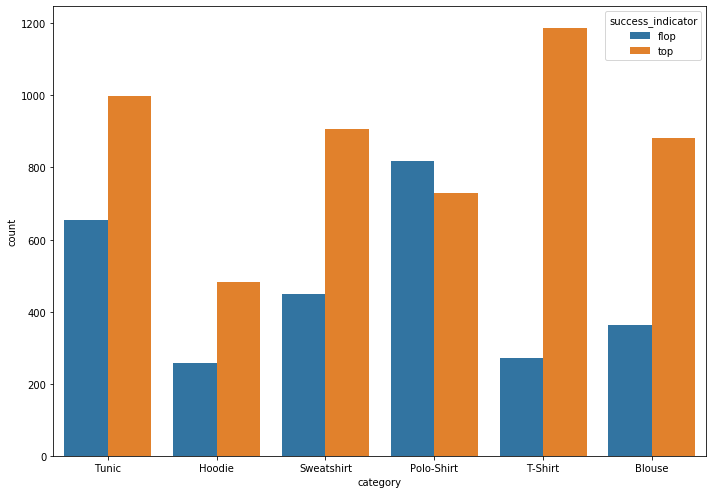

In [50]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(data=data,x='category',hue="success_indicator")

# We can interpret that if the category is Tshirts the rate of being a top product is high wherelese if the ctegory is Polo-Shirt the rate of being a flop product is high.

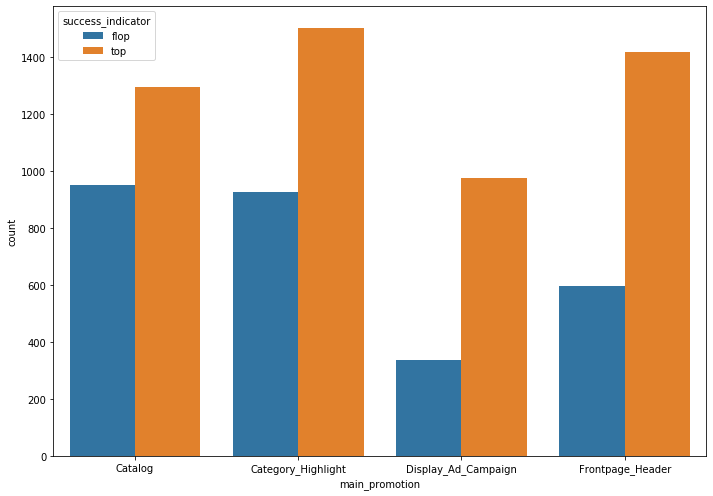

In [49]:
import matplotlib.pyplot as plt
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(data=data,x='main_promotion',hue="success_indicator")

# Insight:-Display Ad Campaign and Frontpage Header are the best options to promote a product as it makes the product a Top product

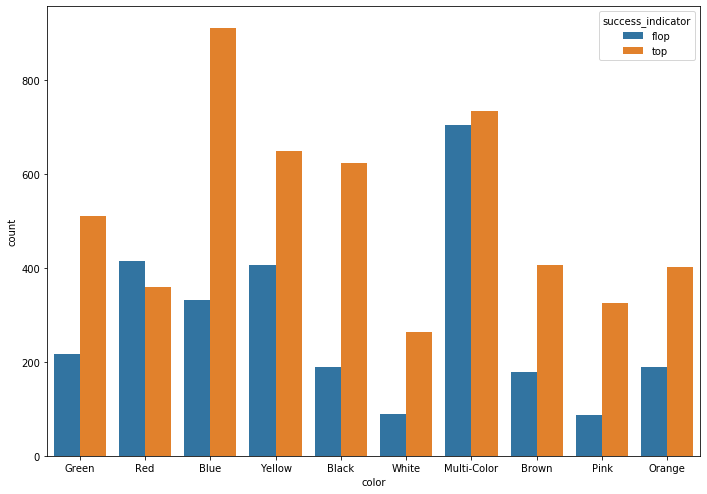

In [51]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(data=data,x='color',hue="success_indicator")

# Blue and black color would make a product more successful.But if the product colour is Re dor Multi_colour the chances of a product Failing is high.

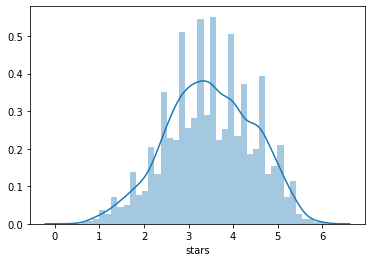

In [54]:
sns.distplot(data.stars)

# Stars feature follows a Normal Distribution

# Feature Selection:-

In [55]:
data

,category,main_promotion,color,stars,success_indicator
0,Tunic,Catalog,Green,3.1,flop
1,Hoodie,Category_Highlight,Red,1.5,flop
2,Sweatshirt,Catalog,Red,4.4,top
3,Polo-Shirt,Category_Highlight,Blue,3.1,flop
4,Hoodie,Category_Highlight,Green,4.1,top
...,...,...,...,...,...
7995,T-Shirt,Catalog,Blue,3.9,flop
7996,Sweatshirt,Frontpage_Header,Green,3.5,top
7997,T-Shirt,Category_Highlight,Yellow,4.0,flop
7998,Blouse,Category_Highlight,Blue,2.6,flop


# Coverting the categorical to numerical features by labelling them using LabelEncoder

In [56]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [57]:
columns=['category','main_promotion','color']

In [58]:
for i in columns:
    data[i]=le.fit_transform(data[i])

In [65]:
import numpy as np
Y=[]
for i in data.success_indicator:
    if i=='flop':
        Y.append(np.int64(0))
    else:
        Y.append(np.int64(1))

In [68]:
del data['success_indicator']

# Feature Selection:- 

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.20, random_state=42)

In [72]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier

In [74]:
forward_selection=SFS(RandomForestClassifier(n_estimators=200,random_state=10,n_jobs=-1),
    k_features=4,forward=True,floating=False,verbose=2,scoring='f1',
   cv=5,n_jobs=-1).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    9.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    9.4s finished

[2021-08-27 19:42:01] Features: 1/4 -- score: 0.8441729040201441[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.1s finished

[2021-08-27 19:42:08] Features: 2/4 -- score: 0.8505630276892294[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    5.8s finished

[2021-08-27 19:42:14] Features: 3/4 -- score: 0.8645254561016007[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.9s finished

[2021-08-27 19:42:17] Features: 4/4 -- score: 0.8645896569092584

# Seems every feature is important as it is increasing the f1 score.

# Modelling:-

# Random Forest:-

In [76]:
from sklearn.ensemble import RandomForestClassifier
n_estimators=[100,150,200]
max_depth=[20,30,40,None]
min_samples_split=[2,4,6]
min_samples_leaf=[1,2,3,4]
max_features=["auto","sqrt","log2"]
ccp_alpha=[0.0,0.00001,0.0001]

In [77]:

parameters_list=dict(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_features=max_features,ccp_alpha=ccp_alpha)

In [78]:
R_Model=RandomForestClassifier(criterion='gini',bootstrap=True,n_jobs=-1,verbose=2)

In [79]:
from sklearn.model_selection import RandomizedSearchCV
Model_rf=RandomizedSearchCV(estimator=R_Model,param_distributions=parameters_list,scoring='f1',n_jobs=-1,cv=8,verbose=3,return_train_score=True,n_iter=10)

In [80]:
randomforest_model=Model_rf.fit(X_train,y_train)

Fitting 8 folds for each of 10 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   27.6s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150
building tree 11 of 150

building tree 12 of 150building tree 13 of 150

building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150building tree 27 of 150building tree 28 of 150building tree 29 of 150



building tree 30 of 150building tree 31 of 150

building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150building tree 36 of 150

building tree 37 of 150building tree 38 of 150

building tree 39 of 150building tree 40 of 150

building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


In [100]:
randomforest_model.best_params_

{'n_estimators': 150,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None,
 'ccp_alpha': 0.0001}

In [104]:
R_Model_F=RandomForestClassifier(criterion='gini',bootstrap=True,n_jobs=-1,verbose=2,n_estimators=150,
 min_samples_split=2,
 min_samples_leaf=4,
 max_features='sqrt',
 max_depth=None,
 ccp_alpha=0.0001)

In [105]:
random_f=R_Model_F.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 1 of 150building tree 2 of 150
building tree 3 of 150

building tree 4 of 150building tree 5 of 150

building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150
building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150building tree 19 of 150

building tree 20 of 150building tree 21 of 150

building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150building tree 27 of 150
building tree 28 of 150

building tree 29 of 150building tree 30 of 150
building tree 31 of 150

building tree 32 of 150
building tree 33 of 150building tree 34 of 150
building tree 35 of 150
building tree 36 of 150building tree 37 of 150


building tree 38 of 150building tree 39 of 150building tree 40 of 150


building tree 41 of 150building tree 42 of 150bui

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.3s finished


In [106]:
predicted_train=random_f.predict(X_train)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished


In [83]:

from sklearn.metrics import *

In [107]:
f1_score(y_train, predicted_train)

0.8988685407675259

In [108]:
accuracy_score(y_train, predicted_train)

0.8644465290806754

# Validation Set Scores:-

In [110]:
test_predicted=random_f.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished


In [111]:
f1_score(y_test, test_predicted)

0.8790170132325142

In [112]:
accuracy_score(y_test, test_predicted)

0.8398999374609131

In [113]:
print(classification_report(y_test, test_predicted))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76       578
           1       0.85      0.91      0.88      1021

    accuracy                           0.84      1599
   macro avg       0.83      0.81      0.82      1599
weighted avg       0.84      0.84      0.84      1599



# XGBOOST:-

In [91]:
from xgboost import XGBClassifier
max_depth=[3,5,8,10,15,20]
min_child_weight=[1,3,5,6]
gamma =[0.0001,0.01,0.1,0.5]
scale_pos_weight=[0.1,0.5,1]
reg_alpha=[1e-5, 1e-2, 0.1, 1, 100]
learning_rate =[0.0001,0.00001,0.01,1]

In [92]:
parameters_xgb=dict(max_depth=max_depth,min_child_weight=min_child_weight,gamma=gamma,scale_pos_weight=scale_pos_weight,reg_alpha=reg_alpha,learning_rate=learning_rate)

In [93]:
XGB_Model=XGBClassifier(booster='gbtree',verbosity =3,tree_method='gpu_hist')

In [94]:
crosscvXGB=RandomizedSearchCV(estimator=XGB_Model,param_distributions=parameters_xgb,scoring='f1',cv=8,verbose=3,return_train_score=True,n_iter=10)

In [95]:

XGB_train_model=crosscvXGB.fit(X_train,y_train)

Fitting 8 folds for each of 10 candidates, totalling 80 fits
[CV] scale_pos_weight=0.1, reg_alpha=1e-05, min_child_weight=1, max_depth=8, learning_rate=1e-05, gamma=0.5 
[19:49:52] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[19:49:53] ======== Monitor: SketchContainer ========
[19:49:53] MakeCuts: 0.001007s, 1 calls @ 1007us

[19:49:53] Prune: 0.000409s, 1 calls @ 409us

[19:49:53] Push: 4.6e-05s, 1 calls @ 46us

[19:49:53] Unique: 0.000529s, 2 calls @ 529us

[19:49:53] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[19:49:53] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========
[19:49:54] ======== Monitor: Learner ========
[19:49:54] Configure: 0s, 1 calls @ 0us

[19:49:54] GetGradient: 0.010372s, 100 calls @ 10372us

[19:49:54] PredictRaw: 0.838646s, 100 calls @ 838646us

[19:49:54] UpdateOneIter: 0.643687s, 100 calls @ 643687us

[19:49:54] ======== Monitor: GBTree ========
[19:49:54] BoostNewTrees: 0.633072s, 100 calls @ 633072us

[19:49:54] CommitModel: 0.012275s, 100 calls @ 12275us

[19:49:54] ======== Device 0 Memory Allocations:  ========
[19:49:54] Peak memory usage: 0MiB
[19:49:54] Number of allocations: 22039
[19:49:54] ======== Monitor: updater_gpu_hist ==

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[19:49:54] ======== Monitor: Learner ========
[19:49:54] Configure: 0.000818s, 1 calls @ 818us

[19:49:54] GetGradient: 0.008627s, 100 calls @ 8627us

[19:49:54] PredictRaw: 0.000571s, 100 calls @ 571us

[19:49:54] UpdateOneIter: 0.491638s, 100 calls @ 491638us

[19:49:54] ======== Monitor: GBTree ========
[19:49:54] BoostNewTrees: 0.470497s, 100 calls @ 470497us

[19:49:54] CommitModel: 0.00917s, 100 calls @ 9170us

[19:49:54] ======== Device 0 Memory Allocations:  ========
[19:49:54] Peak memory usage: 0MiB
[19:49:54] Number of allocations: 39882
[19:49:54] ======== Monitor: updater_gpu_hist ========
[19:49:54] InitData: 0.004517s, 100 calls @ 4517us

[19:49:54] InitDataOnce: 0.004501s, 1 calls @ 4501us

[19:49:54] Update: 0.469662s, 100 calls @ 469662us

[19:49:54] UpdatePredictionCache: 0.009063s, 100 calls @ 9063us

[19:49:54] ======== Monitor: gradient_based_sampler ========
[19:49:54] Sample: 2.7e-05s, 100 calls @ 27us

[19:49:54] ======== Monitor: GPUHistMakerDevice0 ========
[

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s


[19:49:55] ======== Monitor: Learner ========
[19:49:55] Configure: 0.000767s, 1 calls @ 767us

[19:49:55] GetGradient: 0.011006s, 100 calls @ 11006us

[19:49:55] PredictRaw: 0.000823s, 100 calls @ 823us

[19:49:55] UpdateOneIter: 0.622912s, 100 calls @ 622912us

[19:49:55] ======== Monitor: GBTree ========
[19:49:55] BoostNewTrees: 0.596211s, 100 calls @ 596211us

[19:49:55] CommitModel: 0.011332s, 100 calls @ 11332us

[19:49:55] ======== Device 0 Memory Allocations:  ========
[19:49:55] Peak memory usage: 0MiB
[19:49:55] Number of allocations: 60441
[19:49:55] ======== Monitor: updater_gpu_hist ========
[19:49:55] InitData: 0.004673s, 100 calls @ 4673us

[19:49:55] InitDataOnce: 0.004657s, 1 calls @ 4657us

[19:49:55] Update: 0.595076s, 100 calls @ 595076us

[19:49:55] UpdatePredictionCache: 0.011166s, 100 calls @ 11166us

[19:49:55] ======== Monitor: gradient_based_sampler ========
[19:49:55] Sample: 3.4e-05s, 100 calls @ 34us

[19:49:55] ======== Monitor: GPUHistMakerDevice0 ======

[19:49:57] ======== Monitor: Learner ========
[19:49:57] Configure: 0.000845s, 1 calls @ 845us

[19:49:57] GetGradient: 0.007549s, 100 calls @ 7549us

[19:49:57] PredictRaw: 0.000596s, 100 calls @ 596us

[19:49:57] UpdateOneIter: 0.496741s, 100 calls @ 496741us

[19:49:57] ======== Monitor: GBTree ========
[19:49:57] BoostNewTrees: 0.477122s, 100 calls @ 477122us

[19:49:57] CommitModel: 0.008677s, 100 calls @ 8677us

[19:49:57] ======== Device 0 Memory Allocations:  ========
[19:49:57] Peak memory usage: 0MiB
[19:49:57] Number of allocations: 125171
[19:49:57] ======== Monitor: updater_gpu_hist ========
[19:49:57] InitData: 0.004641s, 100 calls @ 4641us

[19:49:57] InitDataOnce: 0.004628s, 1 calls @ 4628us

[19:49:57] Update: 0.476291s, 100 calls @ 476291us

[19:49:57] UpdatePredictionCache: 0.008565s, 100 calls @ 8565us

[19:49:57] ======== Monitor: gradient_based_sampler ========
[19:49:57] Sample: 2.7e-05s, 100 calls @ 27us

[19:49:57] ======== Monitor: GPUHistMakerDevice0 ========

[19:49:58] ======== Monitor: Learner ========
[19:49:58] Configure: 0.000601s, 1 calls @ 601us

[19:49:58] GetGradient: 0.008732s, 100 calls @ 8732us

[19:49:58] PredictRaw: 0.000881s, 100 calls @ 881us

[19:49:58] UpdateOneIter: 0.359383s, 100 calls @ 359383us

[19:49:58] ======== Monitor: GBTree ========
[19:49:58] BoostNewTrees: 0.336958s, 100 calls @ 336958us

[19:49:58] CommitModel: 0.009479s, 100 calls @ 9479us

[19:49:58] ======== Device 0 Memory Allocations:  ========
[19:49:58] Peak memory usage: 0MiB
[19:49:58] Number of allocations: 187801
[19:49:58] ======== Monitor: updater_gpu_hist ========
[19:49:58] InitData: 0.00467s, 100 calls @ 4670us

[19:49:58] InitDataOnce: 0.004655s, 1 calls @ 4655us

[19:49:58] Update: 0.335924s, 100 calls @ 335924us

[19:49:58] UpdatePredictionCache: 0.009345s, 100 calls @ 9345us

[19:49:58] ======== Monitor: gradient_based_sampler ========
[19:49:58] Sample: 3e-05s, 100 calls @ 30us

[19:49:58] ======== Monitor: GPUHistMakerDevice0 ========
[1

[19:50:00] ======== Monitor: Learner ========
[19:50:00] Configure: 0.000571s, 1 calls @ 571us

[19:50:00] GetGradient: 0.007689s, 100 calls @ 7689us

[19:50:00] PredictRaw: 0.00052s, 100 calls @ 520us

[19:50:00] UpdateOneIter: 0.318627s, 100 calls @ 318627us

[19:50:00] ======== Monitor: GBTree ========
[19:50:00] BoostNewTrees: 0.300646s, 100 calls @ 300646us

[19:50:00] CommitModel: 0.007677s, 100 calls @ 7677us

[19:50:00] ======== Device 0 Memory Allocations:  ========
[19:50:00] Peak memory usage: 0MiB
[19:50:00] Number of allocations: 222427
[19:50:00] ======== Monitor: updater_gpu_hist ========
[19:50:00] InitData: 0.004413s, 100 calls @ 4413us

[19:50:00] InitDataOnce: 0.004399s, 1 calls @ 4399us

[19:50:00] Update: 0.299951s, 100 calls @ 299951us

[19:50:00] UpdatePredictionCache: 0.007593s, 100 calls @ 7593us

[19:50:00] ======== Monitor: gradient_based_sampler ========
[19:50:00] Sample: 2.5e-05s, 100 calls @ 25us

[19:50:00] ======== Monitor: GPUHistMakerDevice0 ========


[19:50:01] ======== Monitor: Learner ========
[19:50:01] Configure: 0.000763s, 1 calls @ 763us

[19:50:01] GetGradient: 0.006622s, 100 calls @ 6622us

[19:50:01] PredictRaw: 0.000456s, 100 calls @ 456us

[19:50:01] UpdateOneIter: 0.293451s, 100 calls @ 293451us

[19:50:01] ======== Monitor: GBTree ========
[19:50:01] BoostNewTrees: 0.276886s, 100 calls @ 276886us

[19:50:01] CommitModel: 0.007324s, 100 calls @ 7324us

[19:50:01] ======== Device 0 Memory Allocations:  ========
[19:50:01] Peak memory usage: 0MiB
[19:50:01] Number of allocations: 256353
[19:50:01] ======== Monitor: updater_gpu_hist ========
[19:50:01] InitData: 0.003834s, 100 calls @ 3834us

[19:50:01] InitDataOnce: 0.003822s, 1 calls @ 3822us

[19:50:01] Update: 0.276257s, 100 calls @ 276257us

[19:50:01] UpdatePredictionCache: 0.007239s, 100 calls @ 7239us

[19:50:01] ======== Monitor: gradient_based_sampler ========
[19:50:01] Sample: 2.4e-05s, 100 calls @ 24us

[19:50:01] ======== Monitor: GPUHistMakerDevice0 ========

[19:50:02] ======== Monitor: Learner ========
[19:50:02] Configure: 0.000471s, 1 calls @ 471us

[19:50:02] GetGradient: 0.007436s, 100 calls @ 7436us

[19:50:02] PredictRaw: 0.000592s, 100 calls @ 592us

[19:50:02] UpdateOneIter: 0.299143s, 100 calls @ 299143us

[19:50:02] ======== Monitor: GBTree ========
[19:50:02] BoostNewTrees: 0.281695s, 100 calls @ 281695us

[19:50:02] CommitModel: 0.007558s, 100 calls @ 7558us

[19:50:02] ======== Device 0 Memory Allocations:  ========
[19:50:02] Peak memory usage: 0MiB
[19:50:02] Number of allocations: 290279
[19:50:02] ======== Monitor: updater_gpu_hist ========
[19:50:02] InitData: 0.004689s, 100 calls @ 4689us

[19:50:02] InitDataOnce: 0.004677s, 1 calls @ 4677us

[19:50:02] Update: 0.281056s, 100 calls @ 281056us

[19:50:02] UpdatePredictionCache: 0.007476s, 100 calls @ 7476us

[19:50:02] ======== Monitor: gradient_based_sampler ========
[19:50:02] Sample: 2.2e-05s, 100 calls @ 22us

[19:50:02] ======== Monitor: GPUHistMakerDevice0 ========

[19:50:03] ======== Monitor: Learner ========
[19:50:03] Configure: 0.000708s, 1 calls @ 708us

[19:50:03] GetGradient: 0.007309s, 100 calls @ 7309us

[19:50:03] PredictRaw: 0.000474s, 100 calls @ 474us

[19:50:03] UpdateOneIter: 0.29172s, 100 calls @ 291720us

[19:50:03] ======== Monitor: GBTree ========
[19:50:03] BoostNewTrees: 0.274085s, 100 calls @ 274085us

[19:50:03] CommitModel: 0.007487s, 100 calls @ 7487us

[19:50:03] ======== Device 0 Memory Allocations:  ========
[19:50:03] Peak memory usage: 0MiB
[19:50:03] Number of allocations: 324205
[19:50:03] ======== Monitor: updater_gpu_hist ========
[19:50:03] InitData: 0.003624s, 100 calls @ 3624us

[19:50:03] InitDataOnce: 0.00361s, 1 calls @ 3610us

[19:50:03] Update: 0.273381s, 100 calls @ 273381us

[19:50:03] UpdatePredictionCache: 0.007397s, 100 calls @ 7397us

[19:50:03] ======== Monitor: gradient_based_sampler ========
[19:50:03] Sample: 2.4e-05s, 100 calls @ 24us

[19:50:03] ======== Monitor: GPUHistMakerDevice0 ========
[

[19:50:04] ======== Monitor: Learner ========
[19:50:04] Configure: 0.000594s, 1 calls @ 594us

[19:50:04] GetGradient: 0.007907s, 100 calls @ 7907us

[19:50:04] PredictRaw: 0.000557s, 100 calls @ 557us

[19:50:04] UpdateOneIter: 0.322323s, 100 calls @ 322323us

[19:50:04] ======== Monitor: GBTree ========
[19:50:04] BoostNewTrees: 0.30304s, 100 calls @ 303040us

[19:50:04] CommitModel: 0.008456s, 100 calls @ 8456us

[19:50:04] ======== Device 0 Memory Allocations:  ========
[19:50:04] Peak memory usage: 0MiB
[19:50:04] Number of allocations: 358831
[19:50:04] ======== Monitor: updater_gpu_hist ========
[19:50:04] InitData: 0.004591s, 100 calls @ 4591us

[19:50:04] InitDataOnce: 0.004577s, 1 calls @ 4577us

[19:50:04] Update: 0.302253s, 100 calls @ 302253us

[19:50:04] UpdatePredictionCache: 0.008363s, 100 calls @ 8363us

[19:50:04] ======== Monitor: gradient_based_sampler ========
[19:50:04] Sample: 2.6e-05s, 100 calls @ 26us

[19:50:04] ======== Monitor: GPUHistMakerDevice0 ========


[CV]  scale_pos_weight=0.1, reg_alpha=1, min_child_weight=3, max_depth=3, learning_rate=0.0001, gamma=0.01, score=(train=0.436, test=0.423), total=   0.2s
[19:50:04] ======== Monitor: Learner ========
[19:50:04] Configure: 0.000762s, 1 calls @ 762us

[19:50:04] ======== Monitor: GBTree ========
[19:50:04] ======== Device 0 Memory Allocations:  ========
[19:50:04] Peak memory usage: 0MiB
[19:50:04] Number of allocations: 368255
[19:50:04] ======== Monitor: updater_gpu_hist ========
[CV] scale_pos_weight=0.1, reg_alpha=1, min_child_weight=3, max_depth=3, learning_rate=0.0001, gamma=0.01 
[19:50:05] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure
[19:50:05] ======== Monitor: SketchContainer ========
[19:50:05] MakeCuts: 0.001006s, 1 calls @ 1006us

[19:50:05] Prune: 0.000404s, 1 calls @ 404us

[19:50:05] Push: 3.4e-05s, 1 calls @ 34us

[19:50:05] Unique: 0.000517s, 2 calls @ 517us

[19:50:05] ======== Monitor: xgb

[19:50:05] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure
[19:50:05] ======== Monitor: SketchContainer ========
[19:50:05] MakeCuts: 0.001587s, 1 calls @ 1587us

[19:50:05] Prune: 0.000393s, 1 calls @ 393us

[19:50:05] Push: 3.2e-05s, 1 calls @ 32us

[19:50:05] Unique: 0.000545s, 2 calls @ 545us

[19:50:05] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[19:50:05] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========
[19:50:05] ======== Monitor: Learner ========
[19:50:05] Configure: 0.001007s, 1 calls @ 1007us

[19:50:05] GetGradient: 0.009748s, 100 calls @ 9748us

[19:50:05] PredictRaw: 0.000594s, 100 calls @ 594us

[19:50:05] UpdateOneIter: 0.171106s, 100 calls @ 171106us

[19:50:05] ======== Monitor: GBTree ========
[19:50:05] BoostNewTrees: 0.146926s, 100 calls @ 146926us

[19:50:05] CommitModel: 0.010534s, 100 calls @ 10534us

[19:50:05] ======== Device 0 Memory Alloc

[19:50:09] ======== Monitor: Learner ========
[19:50:09] Configure: 0.00078s, 1 calls @ 780us

[19:50:09] GetGradient: 0.007691s, 100 calls @ 7691us

[19:50:09] PredictRaw: 0.000526s, 100 calls @ 526us

[19:50:09] UpdateOneIter: 1.93202s, 100 calls @ 1932019us

[19:50:09] ======== Monitor: GBTree ========
[19:50:09] BoostNewTrees: 1.90117s, 100 calls @ 1901170us

[19:50:09] CommitModel: 0.019914s, 100 calls @ 19914us

[19:50:09] ======== Device 0 Memory Allocations:  ========
[19:50:09] Peak memory usage: 1MiB
[19:50:09] Number of allocations: 588438
[19:50:09] ======== Monitor: updater_gpu_hist ========
[19:50:09] InitData: 0.003965s, 100 calls @ 3965us

[19:50:09] InitDataOnce: 0.003951s, 1 calls @ 3951us

[19:50:09] Update: 1.9004s, 100 calls @ 1900397us

[19:50:09] UpdatePredictionCache: 0.019793s, 100 calls @ 19793us

[19:50:09] ======== Monitor: gradient_based_sampler ========
[19:50:09] Sample: 3e-05s, 100 calls @ 30us

[19:50:09] ======== Monitor: GPUHistMakerDevice0 ========
[

[19:50:15] ======== Monitor: Learner ========
[19:50:15] Configure: 0.000606s, 1 calls @ 606us

[19:50:15] GetGradient: 0.007653s, 100 calls @ 7653us

[19:50:15] PredictRaw: 0.000594s, 100 calls @ 594us

[19:50:15] UpdateOneIter: 1.88333s, 100 calls @ 1883335us

[19:50:15] ======== Monitor: GBTree ========
[19:50:15] BoostNewTrees: 1.85289s, 100 calls @ 1852893us

[19:50:15] CommitModel: 0.019669s, 100 calls @ 19669us

[19:50:15] ======== Device 0 Memory Allocations:  ========
[19:50:15] Peak memory usage: 1MiB
[19:50:15] Number of allocations: 897111
[19:50:15] ======== Monitor: updater_gpu_hist ========
[19:50:15] InitData: 0.004105s, 100 calls @ 4105us

[19:50:15] InitDataOnce: 0.004091s, 1 calls @ 4091us

[19:50:15] Update: 1.85212s, 100 calls @ 1852124us

[19:50:15] UpdatePredictionCache: 0.019548s, 100 calls @ 19548us

[19:50:15] ======== Monitor: gradient_based_sampler ========
[19:50:15] Sample: 2.9e-05s, 100 calls @ 29us

[19:50:15] ======== Monitor: GPUHistMakerDevice0 ======

[19:50:21] ======== Monitor: Learner ========
[19:50:21] Configure: 0.000723s, 1 calls @ 723us

[19:50:21] GetGradient: 0.007998s, 100 calls @ 7998us

[19:50:21] PredictRaw: 0.000614s, 100 calls @ 614us

[19:50:21] UpdateOneIter: 1.84354s, 100 calls @ 1843543us

[19:50:21] ======== Monitor: GBTree ========
[19:50:21] BoostNewTrees: 1.81204s, 100 calls @ 1812038us

[19:50:21] CommitModel: 0.020183s, 100 calls @ 20183us

[19:50:21] ======== Device 0 Memory Allocations:  ========
[19:50:21] Peak memory usage: 1MiB
[19:50:21] Number of allocations: 1203677
[19:50:21] ======== Monitor: updater_gpu_hist ========
[19:50:21] InitData: 0.005114s, 100 calls @ 5114us

[19:50:21] InitDataOnce: 0.0051s, 1 calls @ 5100us

[19:50:21] Update: 1.81125s, 100 calls @ 1811249us

[19:50:21] UpdatePredictionCache: 0.020062s, 100 calls @ 20062us

[19:50:21] ======== Monitor: gradient_based_sampler ========
[19:50:21] Sample: 3.2e-05s, 100 calls @ 32us

[19:50:21] ======== Monitor: GPUHistMakerDevice0 =======

[CV]  scale_pos_weight=0.1, reg_alpha=1e-05, min_child_weight=6, max_depth=10, learning_rate=1, gamma=0.1, score=(train=0.602, test=0.562), total=   0.2s
[19:50:22] ======== Monitor: Learner ========
[19:50:22] Configure: 0.001313s, 1 calls @ 1313us

[19:50:22] ======== Monitor: GBTree ========
[19:50:22] ======== Device 0 Memory Allocations:  ========
[19:50:22] Peak memory usage: 1MiB
[19:50:22] Number of allocations: 1209834
[19:50:22] ======== Monitor: updater_gpu_hist ========
[CV] scale_pos_weight=0.1, reg_alpha=1e-05, min_child_weight=6, max_depth=10, learning_rate=1, gamma=0.1 
[19:50:22] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure
[19:50:22] ======== Monitor: SketchContainer ========
[19:50:22] MakeCuts: 0.001223s, 1 calls @ 1223us

[19:50:22] Prune: 0.000476s, 1 calls @ 476us

[19:50:22] Push: 4.1e-05s, 1 calls @ 41us

[19:50:22] Unique: 0.000623s, 2 calls @ 623us

[19:50:22] ======== Monitor: xgb

[19:50:22] ======== Monitor: SketchContainer ========
[19:50:22] MakeCuts: 0.001196s, 1 calls @ 1196us

[19:50:22] Prune: 0.000539s, 1 calls @ 539us

[19:50:22] Push: 4.4e-05s, 1 calls @ 44us

[19:50:22] Unique: 0.00061s, 2 calls @ 610us

[19:50:22] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[19:50:22] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========
[19:50:22] ======== Monitor: Learner ========
[19:50:22] Configure: 0.000555s, 1 calls @ 555us

[19:50:22] GetGradient: 0.00801s, 100 calls @ 8010us

[19:50:22] PredictRaw: 0.000502s, 100 calls @ 502us

[19:50:22] UpdateOneIter: 0.133962s, 100 calls @ 133962us

[19:50:22] ======== Monitor: GBTree ========
[19:50:22] BoostNewTrees: 0.116153s, 100 calls @ 116153us

[19:50:22] CommitModel: 0.007419s, 100 calls @ 7419us

[19:50:22] ======== Device 0 Memory Allocations:  ========
[19:50:22] Peak memory usage: 1MiB
[19:50:22] Number of allocations: 1222752
[19:50:22] ======== Monitor: updater_gpu_his

[CV]  scale_pos_weight=0.1, reg_alpha=1e-05, min_child_weight=6, max_depth=10, learning_rate=1, gamma=0.1, score=(train=0.628, test=0.594), total=   0.2s
[19:50:23] ======== Monitor: Learner ========
[19:50:23] Configure: 0.001255s, 1 calls @ 1255us

[19:50:23] ======== Monitor: GBTree ========
[19:50:23] ======== Device 0 Memory Allocations:  ========
[19:50:23] Peak memory usage: 1MiB
[19:50:23] Number of allocations: 1229924
[19:50:23] ======== Monitor: updater_gpu_hist ========
[CV] scale_pos_weight=0.5, reg_alpha=1, min_child_weight=3, max_depth=20, learning_rate=0.01, gamma=0.01 
[19:50:23] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure
[19:50:23] ======== Monitor: SketchContainer ========
[19:50:23] MakeCuts: 0.001759s, 1 calls @ 1759us

[19:50:23] Prune: 0.00072s, 1 calls @ 720us

[19:50:23] Push: 4.1e-05s, 1 calls @ 41us

[19:50:23] Unique: 0.000846s, 2 calls @ 846us

[19:50:23] ======== Monitor: xgbo

[19:50:30] ======== Monitor: Learner ========
[19:50:30] Configure: 0.001002s, 1 calls @ 1002us

[19:50:30] GetGradient: 0.008321s, 100 calls @ 8321us

[19:50:30] PredictRaw: 0.000657s, 100 calls @ 657us

[19:50:30] UpdateOneIter: 1.79655s, 100 calls @ 1796554us

[19:50:30] ======== Monitor: GBTree ========
[19:50:30] BoostNewTrees: 1.39182s, 100 calls @ 1391823us

[19:50:30] CommitModel: 0.392544s, 100 calls @ 392544us

[19:50:30] ======== Device 0 Memory Allocations:  ========
[19:50:30] Peak memory usage: 16MiB
[19:50:30] Number of allocations: 1469769
[19:50:30] ======== Monitor: updater_gpu_hist ========
[19:50:30] InitData: 0.00902s, 100 calls @ 9020us

[19:50:30] InitDataOnce: 0.009006s, 1 calls @ 9006us

[19:50:30] Update: 1.39092s, 100 calls @ 1390922us

[19:50:30] UpdatePredictionCache: 0.392398s, 100 calls @ 392398us

[19:50:30] ======== Monitor: gradient_based_sampler ========
[19:50:30] Sample: 5.2e-05s, 100 calls @ 52us

[19:50:30] ======== Monitor: GPUHistMakerDevice0 ==

[19:50:36] ======== Monitor: Learner ========
[19:50:36] Configure: 0.000492s, 1 calls @ 492us

[19:50:36] GetGradient: 0.008833s, 100 calls @ 8833us

[19:50:36] PredictRaw: 0.000623s, 100 calls @ 623us

[19:50:36] UpdateOneIter: 1.86287s, 100 calls @ 1862867us

[19:50:36] ======== Monitor: GBTree ========
[19:50:36] BoostNewTrees: 1.46612s, 100 calls @ 1466115us

[19:50:36] CommitModel: 0.384785s, 100 calls @ 384785us

[19:50:36] ======== Device 0 Memory Allocations:  ========
[19:50:36] Peak memory usage: 16MiB
[19:50:36] Number of allocations: 1655191
[19:50:36] ======== Monitor: updater_gpu_hist ========
[19:50:36] InitData: 0.008201s, 100 calls @ 8201us

[19:50:36] InitDataOnce: 0.008187s, 1 calls @ 8187us

[19:50:36] Update: 1.46535s, 100 calls @ 1465354us

[19:50:36] UpdatePredictionCache: 0.384668s, 100 calls @ 384668us

[19:50:36] ======== Monitor: gradient_based_sampler ========
[19:50:36] Sample: 5.2e-05s, 100 calls @ 52us

[19:50:36] ======== Monitor: GPUHistMakerDevice0 ==

[19:50:39] ======== Monitor: Learner ========
[19:50:39] Configure: 0.00086s, 1 calls @ 860us

[19:50:39] GetGradient: 0.007848s, 100 calls @ 7848us

[19:50:39] PredictRaw: 0.000697s, 100 calls @ 697us

[19:50:39] UpdateOneIter: 0.951663s, 100 calls @ 951663us

[19:50:39] ======== Monitor: GBTree ========
[19:50:39] BoostNewTrees: 0.921266s, 100 calls @ 921266us

[19:50:39] CommitModel: 0.019141s, 100 calls @ 19141us

[19:50:39] ======== Device 0 Memory Allocations:  ========
[19:50:39] Peak memory usage: 16MiB
[19:50:39] Number of allocations: 1787810
[19:50:39] ======== Monitor: updater_gpu_hist ========
[19:50:39] InitData: 0.004587s, 100 calls @ 4587us

[19:50:39] InitDataOnce: 0.004573s, 1 calls @ 4573us

[19:50:39] Update: 0.920509s, 100 calls @ 920509us

[19:50:39] UpdatePredictionCache: 0.019029s, 100 calls @ 19029us

[19:50:39] ======== Monitor: gradient_based_sampler ========
[19:50:39] Sample: 2.8e-05s, 100 calls @ 28us

[19:50:39] ======== Monitor: GPUHistMakerDevice0 =====

[19:50:42] ======== Monitor: Learner ========
[19:50:42] Configure: 0.000767s, 1 calls @ 767us

[19:50:42] GetGradient: 0.007788s, 100 calls @ 7788us

[19:50:42] PredictRaw: 0.000781s, 100 calls @ 781us

[19:50:42] UpdateOneIter: 0.853717s, 100 calls @ 853717us

[19:50:42] ======== Monitor: GBTree ========
[19:50:42] BoostNewTrees: 0.824251s, 100 calls @ 824251us

[19:50:42] CommitModel: 0.01832s, 100 calls @ 18320us

[19:50:42] ======== Device 0 Memory Allocations:  ========
[19:50:42] Peak memory usage: 16MiB
[19:50:42] Number of allocations: 1908325
[19:50:42] ======== Monitor: updater_gpu_hist ========
[19:50:42] InitData: 0.003235s, 100 calls @ 3235us

[19:50:42] InitDataOnce: 0.003221s, 1 calls @ 3221us

[19:50:42] Update: 0.82344s, 100 calls @ 823440us

[19:50:42] UpdatePredictionCache: 0.018205s, 100 calls @ 18205us

[19:50:42] ======== Monitor: gradient_based_sampler ========
[19:50:42] Sample: 3.1e-05s, 100 calls @ 31us

[19:50:42] ======== Monitor: GPUHistMakerDevice0 ======

[19:50:45] ======== Monitor: Learner ========
[19:50:45] Configure: 0.000527s, 1 calls @ 527us

[19:50:45] GetGradient: 0.007344s, 100 calls @ 7344us

[19:50:45] PredictRaw: 0.000473s, 100 calls @ 473us

[19:50:45] UpdateOneIter: 0.78958s, 100 calls @ 789580us

[19:50:45] ======== Monitor: GBTree ========
[19:50:45] BoostNewTrees: 0.762618s, 100 calls @ 762618us

[19:50:45] CommitModel: 0.016937s, 100 calls @ 16937us

[19:50:45] ======== Device 0 Memory Allocations:  ========
[19:50:45] Peak memory usage: 16MiB
[19:50:45] Number of allocations: 2030234
[19:50:45] ======== Monitor: updater_gpu_hist ========
[19:50:45] InitData: 0.004755s, 100 calls @ 4755us

[19:50:45] InitDataOnce: 0.004741s, 1 calls @ 4741us

[19:50:45] Update: 0.761864s, 100 calls @ 761864us

[19:50:45] UpdatePredictionCache: 0.016835s, 100 calls @ 16835us

[19:50:45] ======== Monitor: gradient_based_sampler ========
[19:50:45] Sample: 2.7e-05s, 100 calls @ 27us

[19:50:45] ======== Monitor: GPUHistMakerDevice0 =====

[19:50:46] ======== Monitor: Learner ========
[19:50:46] Configure: 0.000864s, 1 calls @ 864us

[19:50:46] GetGradient: 0.008189s, 100 calls @ 8189us

[19:50:46] PredictRaw: 0.000481s, 100 calls @ 481us

[19:50:46] UpdateOneIter: 0.14264s, 100 calls @ 142640us

[19:50:46] ======== Monitor: GBTree ========
[19:50:46] BoostNewTrees: 0.120586s, 100 calls @ 120586us

[19:50:46] CommitModel: 0.010921s, 100 calls @ 10921us

[19:50:46] ======== Device 0 Memory Allocations:  ========
[19:50:46] Peak memory usage: 16MiB
[19:50:46] Number of allocations: 2039447
[19:50:46] ======== Monitor: updater_gpu_hist ========
[19:50:46] InitData: 0.004391s, 100 calls @ 4391us

[19:50:46] InitDataOnce: 0.004375s, 1 calls @ 4375us

[19:50:46] Update: 0.119821s, 100 calls @ 119821us

[19:50:46] UpdatePredictionCache: 0.010819s, 100 calls @ 10819us

[19:50:46] ======== Monitor: gradient_based_sampler ========
[19:50:46] Sample: 2.7e-05s, 100 calls @ 27us

[19:50:46] ======== Monitor: GPUHistMakerDevice0 =====

[19:50:46] Configure: 0.000636s, 1 calls @ 636us

[19:50:46] GetGradient: 0.007742s, 100 calls @ 7742us

[19:50:46] PredictRaw: 0.000646s, 100 calls @ 646us

[19:50:46] UpdateOneIter: 0.133809s, 100 calls @ 133809us

[19:50:46] ======== Monitor: GBTree ========
[19:50:46] BoostNewTrees: 0.113873s, 100 calls @ 113873us

[19:50:46] CommitModel: 0.009536s, 100 calls @ 9536us

[19:50:46] ======== Device 0 Memory Allocations:  ========
[19:50:46] Peak memory usage: 16MiB
[19:50:46] Number of allocations: 2048601
[19:50:46] ======== Monitor: updater_gpu_hist ========
[19:50:46] InitData: 0.005214s, 100 calls @ 5214us

[19:50:46] InitDataOnce: 0.005201s, 1 calls @ 5201us

[19:50:46] Update: 0.113216s, 100 calls @ 113216us

[19:50:46] UpdatePredictionCache: 0.009449s, 100 calls @ 9449us

[19:50:46] ======== Monitor: gradient_based_sampler ========
[19:50:46] Sample: 2.1e-05s, 100 calls @ 21us

[19:50:46] ======== Monitor: GPUHistMakerDevice0 ========
[19:50:46] AllReduce: 7.9e-05s, 386 calls @

[19:50:47] ======== Monitor: Learner ========
[19:50:47] Configure: 0.000628s, 1 calls @ 628us

[19:50:47] GetGradient: 0.008892s, 100 calls @ 8892us

[19:50:47] PredictRaw: 0.000809s, 100 calls @ 809us

[19:50:47] UpdateOneIter: 0.778107s, 100 calls @ 778107us

[19:50:47] ======== Monitor: GBTree ========
[19:50:47] BoostNewTrees: 0.743207s, 100 calls @ 743207us

[19:50:47] CommitModel: 0.022349s, 100 calls @ 22349us

[19:50:47] ======== Device 0 Memory Allocations:  ========
[19:50:47] Peak memory usage: 16MiB
[19:50:47] Number of allocations: 2083764
[19:50:47] ======== Monitor: updater_gpu_hist ========
[19:50:47] InitData: 0.004829s, 100 calls @ 4829us

[19:50:47] InitDataOnce: 0.004812s, 1 calls @ 4812us

[19:50:47] Update: 0.74226s, 100 calls @ 742260us

[19:50:47] UpdatePredictionCache: 0.022169s, 100 calls @ 22169us

[19:50:47] ======== Monitor: gradient_based_sampler ========
[19:50:47] Sample: 3.2e-05s, 100 calls @ 32us

[19:50:47] ======== Monitor: GPUHistMakerDevice0 =====

[19:50:50] ======== Monitor: Learner ========
[19:50:50] Configure: 0.000568s, 1 calls @ 568us

[19:50:50] GetGradient: 0.008492s, 100 calls @ 8492us

[19:50:50] PredictRaw: 0.000636s, 100 calls @ 636us

[19:50:50] UpdateOneIter: 0.651276s, 100 calls @ 651276us

[19:50:50] ======== Monitor: GBTree ========
[19:50:50] BoostNewTrees: 0.621457s, 100 calls @ 621457us

[19:50:50] CommitModel: 0.018335s, 100 calls @ 18335us

[19:50:50] ======== Device 0 Memory Allocations:  ========
[19:50:50] Peak memory usage: 16MiB
[19:50:50] Number of allocations: 2169588
[19:50:50] ======== Monitor: updater_gpu_hist ========
[19:50:50] InitData: 0.004914s, 100 calls @ 4914us

[19:50:50] InitDataOnce: 0.004901s, 1 calls @ 4901us

[19:50:50] Update: 0.620691s, 100 calls @ 620691us

[19:50:50] UpdatePredictionCache: 0.018232s, 100 calls @ 18232us

[19:50:50] ======== Monitor: gradient_based_sampler ========
[19:50:50] Sample: 3.1e-05s, 100 calls @ 31us

[19:50:50] ======== Monitor: GPUHistMakerDevice0 ====

[19:50:52] ======== Monitor: Learner ========
[19:50:52] Configure: 0.000738s, 1 calls @ 738us

[19:50:52] GetGradient: 0.007992s, 100 calls @ 7992us

[19:50:52] PredictRaw: 0.000578s, 100 calls @ 578us

[19:50:52] UpdateOneIter: 0.692253s, 100 calls @ 692253us

[19:50:52] ======== Monitor: GBTree ========
[19:50:52] BoostNewTrees: 0.662891s, 100 calls @ 662891us

[19:50:52] CommitModel: 0.018247s, 100 calls @ 18247us

[19:50:52] ======== Device 0 Memory Allocations:  ========
[19:50:52] Peak memory usage: 16MiB
[19:50:52] Number of allocations: 2250126
[19:50:52] ======== Monitor: updater_gpu_hist ========
[19:50:52] InitData: 0.004687s, 100 calls @ 4687us

[19:50:52] InitDataOnce: 0.004673s, 1 calls @ 4673us

[19:50:52] Update: 0.662117s, 100 calls @ 662117us

[19:50:52] UpdatePredictionCache: 0.018137s, 100 calls @ 18137us

[19:50:52] ======== Monitor: gradient_based_sampler ========
[19:50:52] Sample: 2.9e-05s, 100 calls @ 29us

[19:50:52] ======== Monitor: GPUHistMakerDevice0 ====

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.0min finished


[19:50:53] ======== Monitor: Learner ========
[19:50:53] Configure: 0.000849s, 1 calls @ 849us

[19:50:53] GetGradient: 0.007926s, 100 calls @ 7926us

[19:50:53] PredictRaw: 0.000595s, 100 calls @ 595us

[19:50:53] UpdateOneIter: 0.870416s, 100 calls @ 870416us

[19:50:53] ======== Monitor: GBTree ========
[19:50:53] BoostNewTrees: 0.840217s, 100 calls @ 840217us

[19:50:53] CommitModel: 0.019047s, 100 calls @ 19047us

[19:50:53] ======== Device 0 Memory Allocations:  ========
[19:50:53] Peak memory usage: 16MiB
[19:50:53] Number of allocations: 2319841
[19:50:53] ======== Monitor: updater_gpu_hist ========
[19:50:53] InitData: 0.004462s, 100 calls @ 4462us

[19:50:53] InitDataOnce: 0.004446s, 1 calls @ 4446us

[19:50:53] Update: 0.839395s, 100 calls @ 839395us

[19:50:53] UpdatePredictionCache: 0.018933s, 100 calls @ 18933us

[19:50:53] ======== Monitor: gradient_based_sampler ========
[19:50:53] Sample: 3e-05s, 100 calls @ 30us

[19:50:53] ======== Monitor: GPUHistMakerDevice0 ======

In [114]:
XGB_train_model.best_params_

{'scale_pos_weight': 1,
 'reg_alpha': 0.01,
 'min_child_weight': 6,
 'max_depth': 15,
 'learning_rate': 1e-05,
 'gamma': 0.01}

In [115]:
XGB_Model_f=XGBClassifier(booster='gbtree',verbosity =3,tree_method='gpu_hist',scale_pos_weight=1,
 reg_alpha= 0.01,
 min_child_weight=6,
 max_depth=15,
 learning_rate=1e-05,
 gamma=0.01)

In [116]:
xgb_f=XGB_Model_f.fit(X_train,y_train)

[20:04:47] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure
[20:04:47] ======== Monitor: SketchContainer ========
[20:04:47] MakeCuts: 0.000818s, 1 calls @ 818us

[20:04:47] Prune: 0.000345s, 1 calls @ 345us

[20:04:47] Push: 3.3e-05s, 1 calls @ 33us

[20:04:47] Unique: 0.000406s, 2 calls @ 406us

[20:04:47] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[20:04:47] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========
[20:04:47] ======== Monitor: Learner ========
[20:04:47] Configure: 0.000725s, 1 calls @ 725us

[20:04:47] GetGradient: 0.007708s, 100 calls @ 7708us

[20:04:47] PredictRaw: 0.018152s, 100 calls @ 18152us

[20:04:47] UpdateOneIter: 0.905844s, 100 calls @ 905844us

[20:04:47] ======== Monitor: GBTree ========
[20:04:47] BoostNewTrees: 0.855007s, 100 calls @ 855007us

[20:04:47] CommitModel: 0.021572s, 100 calls @ 21572us

[20:04:47] ======== Device 0 Memory Alloc

In [117]:
predicted_xg_train=xgb_f.predict(X_train)

[20:04:56] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure
[20:04:56] ======== Device 0 Memory Allocations:  ========
[20:04:56] Peak memory usage: 16MiB
[20:04:56] Number of allocations: 2360713
[20:04:56] ======== Monitor:  ========


In [118]:
f1_score(y_train, predicted_xg_train)

0.8785373238616512

# validation Set Score

In [120]:
predicted_xg_test=xgb_f.predict(X_test)

In [121]:
f1_score(y_test, predicted_xg_test)

0.8645343367826905

In [122]:
accuracy_score(y_test, predicted_xg_test)

0.8198874296435272

In [124]:
print(classification_report(y_test, predicted_xg_test))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73       578
           1       0.83      0.90      0.86      1021

    accuracy                           0.82      1599
   macro avg       0.81      0.79      0.80      1599
weighted avg       0.82      0.82      0.82      1599



# KNN Regressor

In [125]:
n_neighbors=[5,10,15,20,40]
weights=['uniform','distance']
algorithm=['auto']
leaf_size=[15,30,45,50]
p=[1,2]
from sklearn.neighbors import KNeighborsClassifier
KNNClassifier=KNeighborsClassifier(n_jobs=-1,algorithm='auto')

In [126]:
parameters_KNN=dict(n_neighbors=n_neighbors,weights=weights,algorithm=algorithm,leaf_size=leaf_size,p=p)

In [127]:
crosscvknn=RandomizedSearchCV(estimator=KNNClassifier,param_distributions=parameters_KNN,scoring='f1',n_jobs=-1,cv=8,verbose=3,return_train_score=True,n_iter=10)

In [128]:
KNNModel=crosscvknn.fit(X_train,y_train)

Fitting 8 folds for each of 10 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   18.3s finished


In [129]:
KNNModel.best_params_

{'weights': 'uniform',
 'p': 2,
 'n_neighbors': 10,
 'leaf_size': 30,
 'algorithm': 'auto'}

In [132]:
KNNCL=KNeighborsClassifier(n_jobs=-1,algorithm='auto',weights='uniform',
 p=2,
 n_neighbors=10,
 leaf_size=30,)

In [133]:
KNN_model=KNNCL.fit(X_train,y_train)

In [134]:
predicted_knn_train=KNN_model.predict(X_train)
f1_score(y_train, predicted_knn_train)

0.8932518222431225

# Validation Set Scores:-

In [136]:
predicted_test=KNN_model.predict(X_test)

In [137]:
accuracy_score(y_test, predicted_test)

0.8480300187617261

In [138]:
f1_score(y_test, predicted_test)

0.8843407900999523

In [139]:
print(classification_report(y_test, predicted_test))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78       578
           1       0.86      0.91      0.88      1021

    accuracy                           0.85      1599
   macro avg       0.84      0.82      0.83      1599
weighted avg       0.85      0.85      0.85      1599



# Let us consider KNN as it a simpler model with less latency.Also it has greater F1 score and a good accuracy.

In [140]:
import pickle
pickle.dump(KNN_model, open(r"C:\Users\91996\Desktop\ML\direction\Deliverable\model_knn.pkl", 'wb'))

# Checking for test(Prediction) Input:-

In [141]:
test_data

,category,main_promotion,color,stars
0,Sweatshirt,Catalog,Blue,3.1
1,Polo-Shirt,Frontpage_Header,Yellow,2.6
2,Tunic,Catalog,Green,2.7
3,Polo-Shirt,Catalog,Yellow,2.6
4,Tunic,Catalog,Yellow,4.9
...,...,...,...,...
1995,T-Shirt,Category_Highlight,Green,5.0
1996,Tunic,Catalog,Green,2.6
1997,Polo-Shirt,Catalog,Orange,2.7
1998,Blouse,Frontpage_Header,Multi-Color,2.7


In [142]:
for i in columns:
    test_data[i]=le.fit_transform(test_data[i])

In [145]:
loaded_model = pickle.load(open(r"C:\Users\91996\Desktop\ML\direction\Deliverable\model_knn.pkl", 'rb'))

In [147]:
predictions=loaded_model.predict(test_data)

In [148]:
predictions

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [149]:
test_data=pd.read_csv(r"C:\Users\91996\Desktop\ML\direction\Deliverable\prediction_input.csv")

In [152]:
final_dataframe=pd.DataFrame()
final_dataframe['item_no']=test_data['item_no']
final_dataframe['predictions']=predictions

In [153]:
final_dataframe

,item_no,predictions
0,405901,1
1,644275,0
2,533070,0
3,829436,0
4,801722,1
...,...,...
1995,376794,1
1996,470289,0
1997,271185,0
1998,765041,0


# Final Dataset:-

In [154]:
top_flop=[]
for i in final_dataframe.predictions:
    if i==1:
        top_flop.append("top")
    else:
        top_flop.append("flop")

In [155]:
final_dataframe['top_flop']=top_flop

In [156]:
final_dataframe

,item_no,predictions,top_flop
0,405901,1,top
1,644275,0,flop
2,533070,0,flop
3,829436,0,flop
4,801722,1,top
...,...,...,...
1995,376794,1,top
1996,470289,0,flop
1997,271185,0,flop
1998,765041,0,flop


In [157]:
final_dataframe.to_csv(r"C:\Users\91996\Desktop\ML\direction\Deliverable\submission_dataframe.csv")